<a href="https://colab.research.google.com/github/victoriaribeiro/homework02/blob/master/Homework2_Victoria_Rodrigues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HomeWork 2

## Problem 1

Consider i.i.d. data samples $\mathbf{X}=\left\{x_i\right\}^N_{i=1}$. Suppose that the data samples are drawn from a Poisson distribution with parameter $\lambda$. The Poisson distribution takes the form: $$p\left(x\mid\lambda\right)=\frac{\lambda^xe^{-\lambda}}{x!}$$.

### 1. Find the MLE estimate for the parameter  𝜆  assuming a Poisson data likelihood.

The data likelihood function is: 
$$P(\mathbf{X}|\lambda) = \prod_{n=1}^N P(\mathbf{x}_n|\mathbf{\lambda}) = \prod_{n=1}^N \frac{\lambda^{x_n}e^{-\lambda}}{x_n!}$$

We then apply the log function to our data likelihood. We can call it the log-likelihood function:

$$\mathcal{L} = \ln\left(\prod_{n=1}^N P(\mathbf{x}_n|\mathbf{\lambda})\right)$$

$$ \mathcal{L} = \ln\left(\prod_{n=1}^N \frac{\lambda^{x_n}e^{-\lambda}}{x_n!}\right) $$

$$ \mathcal{L} = \sum_{n=1}^{N} \left ( \ln( e^{-\lambda}) - \ln(x_n!)) + \ln (\lambda^{x_j} )  \right ) $$

$$ \mathcal{L} = \sum_{n=1}^{N} \left ( -\lambda - \ln(x_n!) + x_j\ln (\lambda )  \right )$$

$$ \mathcal{L} = -N\lambda - \sum_{n=1}^{N}  \ln(x_n!) + \ln(\lambda)\sum_{n=1}^{N} x_n $$

We want to find:
$$ \hat{\lambda} = arg_\lambda max \mathcal{L}$$

So we take the first derivative with respect to $\lambda$ and equal it to $0$:

$$ \frac{\partial  }{\partial \lambda} \left  (-N\lambda - \sum_{n=1}^{N}  \ln(x_j!) + \ln(\lambda)\sum_{n=1}^{N} x_j\right ) = 0 $$

Finally
$$\hat{\lambda} = \frac{1}{N} \sum_{n=1}^{N} x_j = \frac{X}{N}$$




### 2. Assuming a Gamma distribution as the prior distribution on the parameter $\lambda$, find the MAP estimate for the parameter $\lambda$. The Gamma distribution takes the form $p(\lambda|\alpha,\beta) = \frac{\beta^{\alpha}}{\Gamma(\alpha)}\lambda^{\alpha-1}e^{-\beta\lambda}$.

![alt text](https://drive.google.com/uc?id=1POWfIH0W8nMI6nv5X20yahMg9MpyPqhm)


## Problem 2

### 1. Implement the probabilistic generative classifier, under the assumption that your data likelihood model $p(x|C_j)$ is a multivariate Gaussian and the prior probabilities $p(C_j)$ are dictated by the number of samples $n_j\in\mathbb{R}$ that you have for each class. This classifier is given by comparing the posterior probability for each class $C_j$. We assume that each class $C_j$ can have an arbitrary mean $\mu_j\in\mathbb{R}^{d\times 1}$ and an arbitrary full covariance matrix $\Sigma_j\in\mathbb{R}^{d\times d}$. Both of these quantities are to be estimated from the observations in each class.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import multivariate_normal

data = pd.read_csv("crab.txt", delimiter="\t")
data = (data - data.mean())/ data.std()
data.Species = data.Species.round()
data.head()

training = data[:140]
test = data[140:]


class0X = training.loc[training['Species'] == -1].drop('Species', axis=1)
class1X = training.loc[training['Species'] == 1].drop('Species', axis=1)

class0Y = training.loc[training['Species'] == -1]['Species']
class1Y = training.loc[training['Species'] == 1]['Species']

training_data = training.drop('Species', axis=1)
test_data = test.drop('Species', axis=1)
test_true = test['Species']
training_labels = training['Species']



In [0]:
mu0 = np.mean(class0X)

cov0 = class0X.cov()

mu1 = np.mean(class1X)
cov1 = class1X.cov()

pC0 = len(class0Y.index) / len(training.index)
pC1 = len(class1Y.index) / len(training.index)

In [0]:
def confusion_matrix_(true, pred):
  true = np.where(true==-1, 0, true) 
  pred = np.where(pred==-1, 0, pred) 

  classes = np.unique(pred).size
  cm = np.bincount(true * classes + pred).reshape((classes, classes))
  return cm


array([[28,  0],
       [ 0, 32]])

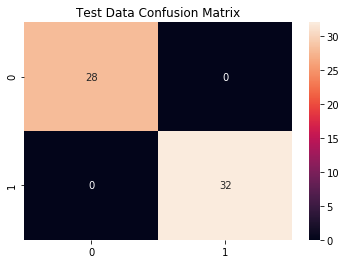

In [4]:
import seaborn as sn

var = multivariate_normal(mean=mu0, cov=cov0, allow_singular=True)
y0 = var.pdf(test_data)

var = multivariate_normal(mean=mu1, cov=cov1, allow_singular=True)
y1 = var.pdf(test_data)


pos0 = (y0*pC0)/(y1*pC1 + y0*pC0)
pos1 = (y1*pC1)/(y1*pC1 + y0*pC0)

pred = []
for t0, t1 in zip(pos0, pos1):
    if(t0>t1):
        pred.append(-1)
    else:
        pred.append(1)

cm = confusion_matrix_(test_true.to_numpy().astype(int), np.asarray(pred))
sn.heatmap(cm,  annot=True)
plt.title('Test Data Confusion Matrix')
cm

array([[72,  0],
       [ 0, 68]])

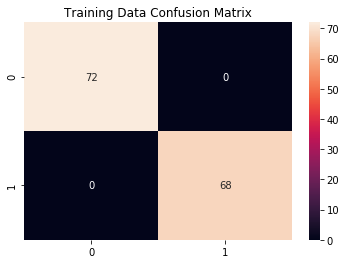

In [5]:

var = multivariate_normal(mean=mu0, cov=cov0, allow_singular=True)
y0 = var.pdf(training_data)

var = multivariate_normal(mean=mu1, cov=cov1, allow_singular=True)
y1 = var.pdf(training_data)


pos0 = (y0*pC0)/(y1*pC1 + y0*pC0)
pos1 = (y1*pC1)/(y1*pC1 + y0*pC0)

pred = []
for t0, t1 in zip(pos0, pos1):
    if(t0>t1):
        pred.append(-1)
    else:
        pred.append(1)

cm = confusion_matrix_(training_labels.to_numpy().astype(int), np.asarray(pred))
sn.heatmap(cm,  annot=True)
plt.title('Training Data Confusion Matrix')
cm

## I did not encounter any major problems while implementing the probabilistic generative model.

## 2.4 $k$-Nearest Neighbor

## Test Data

In [0]:
from scipy.spatial.distance import pdist

from math import floor

def knn(k, td, training_data):
    td = td.to_numpy()
    pred = []
    no_label_td = training_data.drop('Species', axis=1)
    
    for new_point in td:
        aux  = np.vstack((new_point, no_label_td))
        dist =  pdist(aux)[:training_data.shape[0]-1]
        
        sorted_dist = np.argsort(dist)

        neighboors = training_data.iloc[sorted_dist[:k]].Species.to_numpy()          
        result = np.bincount(neighboors).argmax()            
        pred.append(result)

    return(pred)

In [0]:
data = pd.read_csv("crab.txt", delimiter="\t")
training = data[:140]
test = data[140:]

training_labels = training['Species']
training_data = training
test_data = test.drop('Species', axis=1)
test_labels = test['Species']

training_data = (training_data - training_data.mean())/training_data.std()
test_data = (test_data - test_data.mean())/test_data.std()
training_data['Species'] = training['Species']


res = []
for k in range(1,51):   
    
    pred = knn(k, test_data, training_data)
    acc = len(["ok" for i, label in enumerate(test_labels) if label == pred[i]]) / len(test_labels)
    err = 1-acc
    res.append([acc, err])



(0, 1)

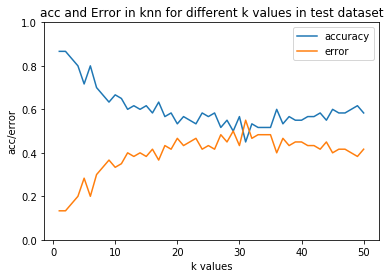

In [8]:
plt.plot(range(1,51), res)
plt.title('acc and Error in knn for different k values in test dataset')
plt.xlabel('k values')
plt.ylabel('acc/error')
plt.legend(('accuracy','error'))
plt.ylim(0,1)


array([[17, 11],
       [ 6, 26]])

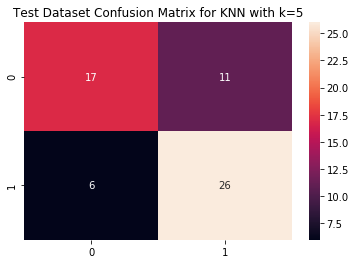

In [9]:
pred = knn(5, test_data, training_data)

cm = confusion_matrix_(test_labels.to_numpy().astype(int), np.asarray(pred))
sn.heatmap(cm,  annot=True)
plt.title('Test Dataset Confusion Matrix for KNN with k=5')
cm

## Training Data

(0, 1)

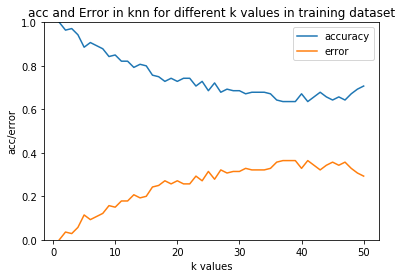

In [10]:
data = pd.read_csv("crab.txt", delimiter="\t")
training = data[:140]
test = data[140:]

training_labels = training['Species']
training_data = training
test_data = test.drop('Species', axis=1)
test_labels = test['Species']

training_data = (training_data - training_data.mean())/training_data.std()
test_data = (test_data - test_data.mean())/test_data.std()
training_data['Species'] = training['Species']


res = []
for k in range(1,51):   
    
    pred = knn(k, training_data.drop('Species', axis=1), training_data)

    acc = len(["ok" for i, label in enumerate(training_labels) if label == pred[i]]) / len(training_labels)
    err = 1-acc
    res.append([acc, err])
  
plt.plot(range(1,51), res)
plt.title('acc and Error in knn for different k values in training dataset')
plt.xlabel('k values')
plt.ylabel('acc/error')
plt.legend(('accuracy','error'))
plt.ylim(0,1)



array([[60, 12],
       [ 4, 64]])

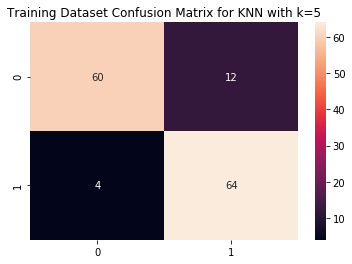

In [11]:
pred = knn(5, training_data.drop('Species', axis=1), training_data)

cm = confusion_matrix_(training_labels.to_numpy().astype(int), np.asarray(pred))
sn.heatmap(cm,  annot=True)
plt.title('Training Dataset Confusion Matrix for KNN with k=5')
cm

## 2.7 - Determine which classifier you would use for the crab data set and give an explanation of your reasoning.

For this specific dataset I would use the probabilistic generative classifier, because of its prediction power. The reason I believe it performs better than KNN is that it is a small dataset and the multivariative gaussians can describe the dataset better than knn. Having 7 features and only 200 instances may be too sparse for knn.

# Problem 3

![alt text](https://drive.google.com/uc?id=1CFfs6idMeBwW6qoR3auIw2xIS6hAtLqD)